Here, we will be covering carbon levels in the following locations:
    AZ Canal, CAP Canal, Chandler, Mesa Turnout, Salt River, Tempe, Verde River
        
TOC = Total Organic carbon. This is the amount of carbon found in organic compound and is a non-specific indicator of water quality. Should not go over 25 ppm, most lakes are between 2-10 mg/L.

DOC = Dissolved organic carbon. This covers a fraction of what total organic carbon can pass through a filter. Too much DOC in water can lead to an increase in bacteria growth. Should not go over 5 mg/L.

UVA = Ultraviolet absorbance. This is a water quality test paramerter that uses UV rays to see the amount of carbon per cm (cm-1).

SUVA = Specific Ultraviolet Absorbance. It is the absorbance of UV light in a water sample at a specified wavelength. It is normalized for DOC concentration. Should not exceed 2.0 L/mg-m.

In [1]:
#Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the CSV files

carbon = "Carbon.csv"
carbon_df = pd.read_csv(carbon)

In [3]:
#Show the CSV file
carbon_df

,site number,site location,Cluster,site acronym,date,sample type,TOC (mg/L),DOC (mg/L),UVA (cm-1),suva (L/mg-m),peak int,peak int WL,int at 450,int at 460,int at 500,FI (450/500),docm comments
0,R5,Verde River btwn Horseshoe and Bartlett,verde,verde abv bartlett,1999,NaN,2.750,2.777,0.0793,0.028556,92.67,446.36,92.45,87.86,52.34,1.766336,NaN
1,R6A,Bartlett Reservoir near outlet,verde,bartlett-epi,1999,NaN,1.934,1.845,0.0406,0.022005,48.65,448.62,48.23,45.52,27.28,1.767962,NaN
2,R6B,Bartlett Reservoir near outlet,verde,bartlett-hypo,1999,NaN,1.735,1.614,0.0412,0.025527,51.89,448.74,51.38,48.71,29.00,1.771724,NaN
3,R7,Verde River below Bartlett Reservoir,verde,verde blw barlett,1999,NaN,1.775,1.626,0.0373,0.022940,47.95,447.02,47.52,44.38,26.25,1.810286,NaN
4,R10,Salt River below Saguaro (Blue Point Bridge),salt,salt blw saguaro,1999,NaN,2.943,2.711,0.0549,0.020251,62.98,446.30,62.62,58.61,34.44,1.818235,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9880,SPT OUT,Tempe's South Plant treated water,tempe,STP Out,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9881,SRNR,Salt River near Roosevelt,salt,SRNR,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9882,UH IN,Union Hills Inlet,cap,Union Hills Inlet,2016,NaN,NaN,NaN,0.0480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9883,UH IN,Union Hills Inlet,cap,Union Hills Inlet,2016,NaN,NaN,NaN,0.0480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Count the number of rows per column

carbon_df.count()

site number      9871
site location    9867
Cluster          8691
site acronym     9765
date             9885
sample type        78
TOC (mg/L)        946
DOC (mg/L)       7161
UVA (cm-1)       7286
suva (L/mg-m)    7217
peak int          743
peak int WL       743
int at 450        743
int at 460        743
int at 500        744
FI (450/500)      744
docm comments      21
dtype: int64

In [5]:
#Only show the columns that you need, and clean up the unknown information

carbon_cleanup = carbon_df [["site number", "site location", "Cluster", "date", "TOC (mg/L)", "DOC (mg/L)", "UVA (cm-1)", "suva (L/mg-m)"]]
carbon_cleanup = carbon_cleanup.dropna()

In [6]:
#Show the new count of rows we are working with

carbon_cleanup.count()

site number      894
site location    894
Cluster          894
date             894
TOC (mg/L)       894
DOC (mg/L)       894
UVA (cm-1)       894
suva (L/mg-m)    894
dtype: int64

In [7]:
carbon_cleanup

,site number,site location,Cluster,date,TOC (mg/L),DOC (mg/L),UVA (cm-1),suva (L/mg-m)
0,R5,Verde River btwn Horseshoe and Bartlett,verde,1999,2.750,2.777,0.0793,0.028556
1,R6A,Bartlett Reservoir near outlet,verde,1999,1.934,1.845,0.0406,0.022005
2,R6B,Bartlett Reservoir near outlet,verde,1999,1.735,1.614,0.0412,0.025527
3,R7,Verde River below Bartlett Reservoir,verde,1999,1.775,1.626,0.0373,0.022940
4,R10,Salt River below Saguaro (Blue Point Bridge),salt,1999,2.943,2.711,0.0549,0.020251
...,...,...,...,...,...,...,...,...
2983,R9B,Saguaro Lake near inlet,salt,2004,4.073,4.080,0.0668,1.600000
3021,R6A,Bartlett Reservoir near outlet,verde,2004,2.993,2.780,0.0484,1.700000
3022,R6B,Bartlett Reservoir near outlet,verde,2004,2.862,2.730,0.0506,1.900000
3025,R9A,Saguaro Lake near inlet,salt,2004,5.045,4.730,0.0694,1.500000


In [8]:
#Create a scatter plot showing the TOC levels

carbon_x = carbon_cleanup['date'];
carbon_y = carbon_cleanup['TOC (mg/L)']

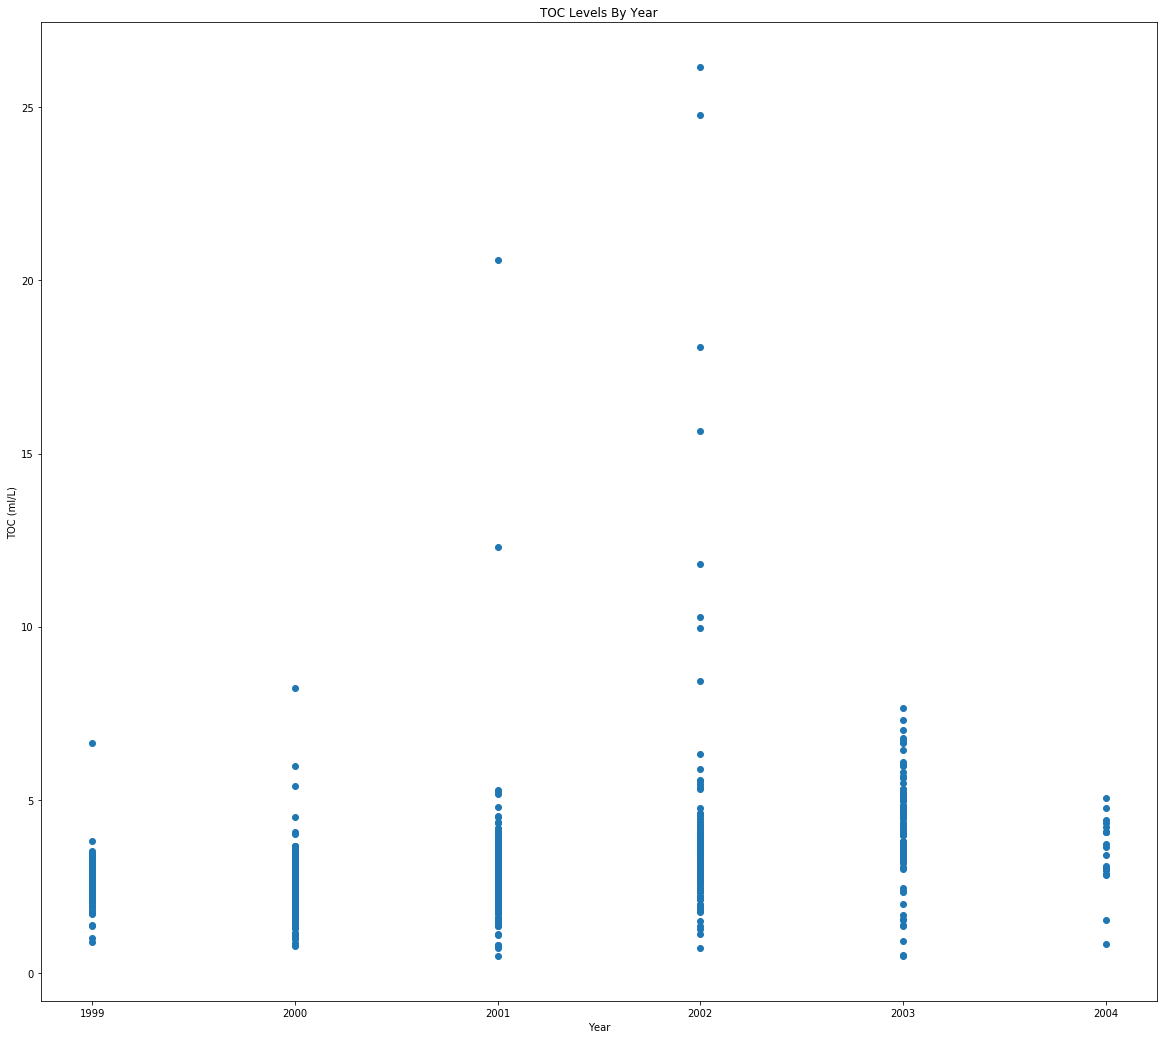

In [9]:
plt.figure(figsize=(20,18))

plt.title("TOC Levels By Year")
plt.xlabel('Year');
plt.ylabel('TOC (ml/L)')

plt.scatter (carbon_x,carbon_y)

#plt.savefig('toc levels')

This scatter plot shows all of the levels for each resevoir and canal per collection time.

For the most part, the TOC levels have stayed under the 25 ml/L guidelines, with a few instances where we went over 25 ml/L in 2002.


In [10]:
#Create a scatter plot showing the DOC levels

doc_x = carbon_cleanup['date'];
doc_y = carbon_cleanup['DOC (mg/L)']

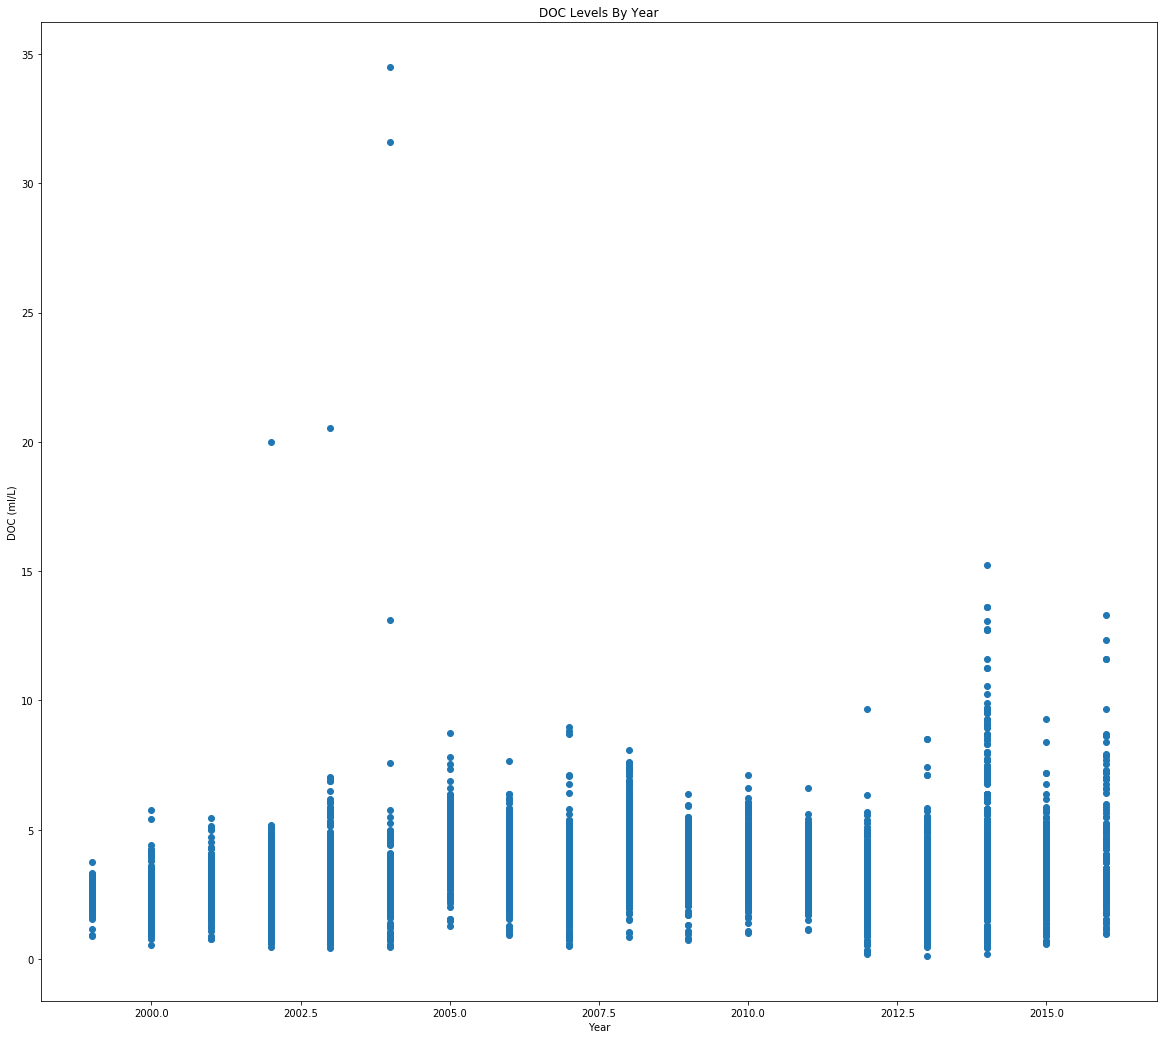

In [25]:
plt.figure(figsize=(20,18))

plt.title("DOC Levels By Year")
plt.xlabel('Year');
plt.ylabel('DOC (ml/L)')

plt.scatter (doc_x,doc_y)

#plt.savefig('doc levels_1')

This scatter plot shows all of the levels for each resevoir and canal per collection time.

Most of the data shows the DOC levels staying under 5 ml/L, however there are a few times where we have gone over. In 2003 there was a staggering number of times where the DOC levels were over 5 ml/L, which means there was a chance of extra bacteria growth.

In [12]:
#Create a scatter plot showing the UVA levels

uva_x = carbon_cleanup['date'];
uva_y = carbon_cleanup['UVA (cm-1)']

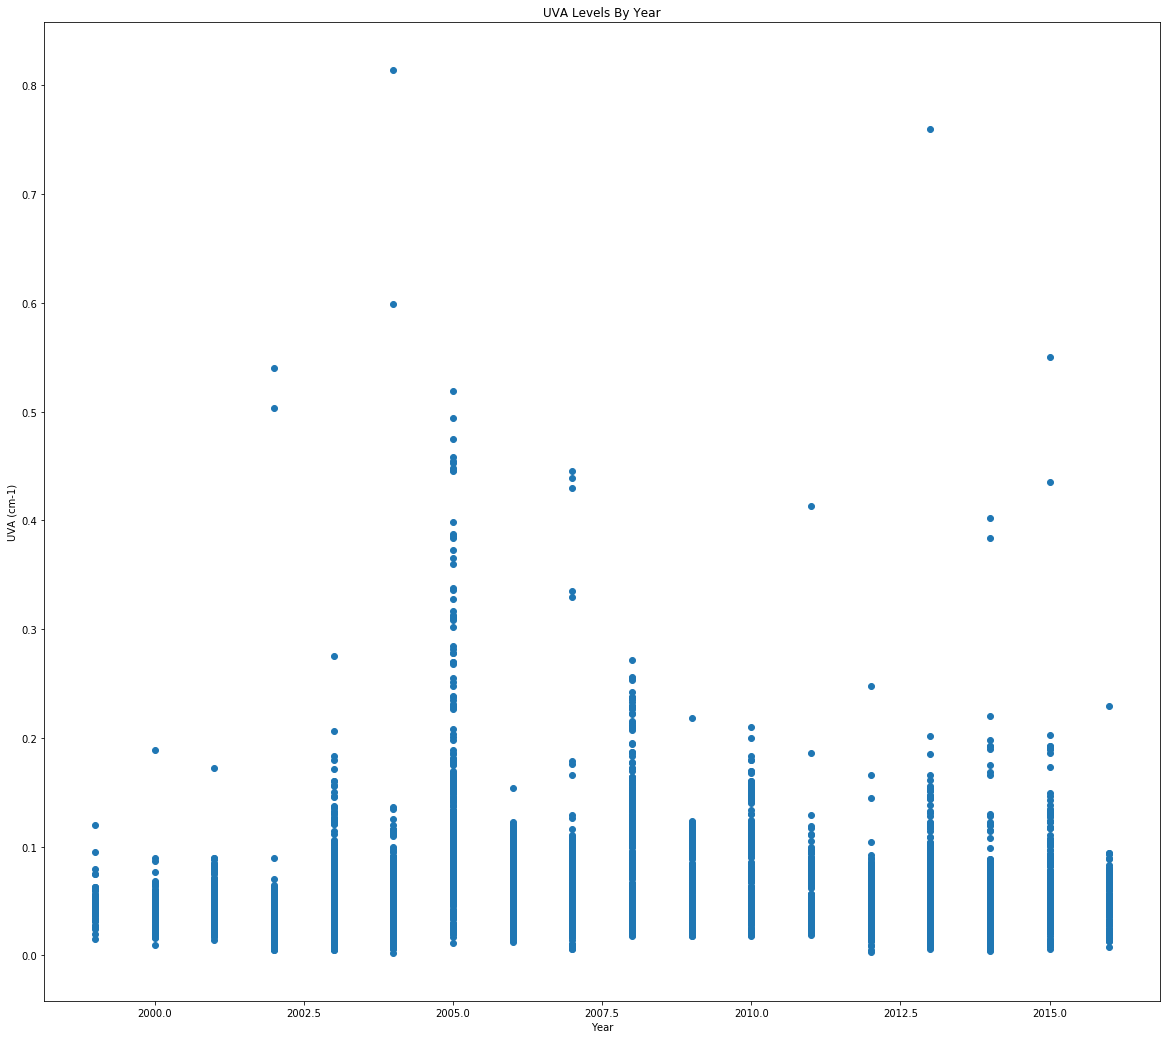

In [26]:
plt.figure(figsize=(20,18))

plt.title("UVA Levels By Year")
plt.xlabel('Year');
plt.ylabel('UVA (cm-1)')

plt.scatter (uva_x,uva_y)

#plt.savefig('uva levels_1')

This scatter plot shows all of the levels for each resevoir and canal per collection time.

The amount of carbon that shows per centimeter of UV light stays pretty consistent.

In [14]:
#Create a scatter plot showing the SUVA levels

suva_x = carbon_cleanup['date'];
suva_y = carbon_cleanup['suva (L/mg-m)']

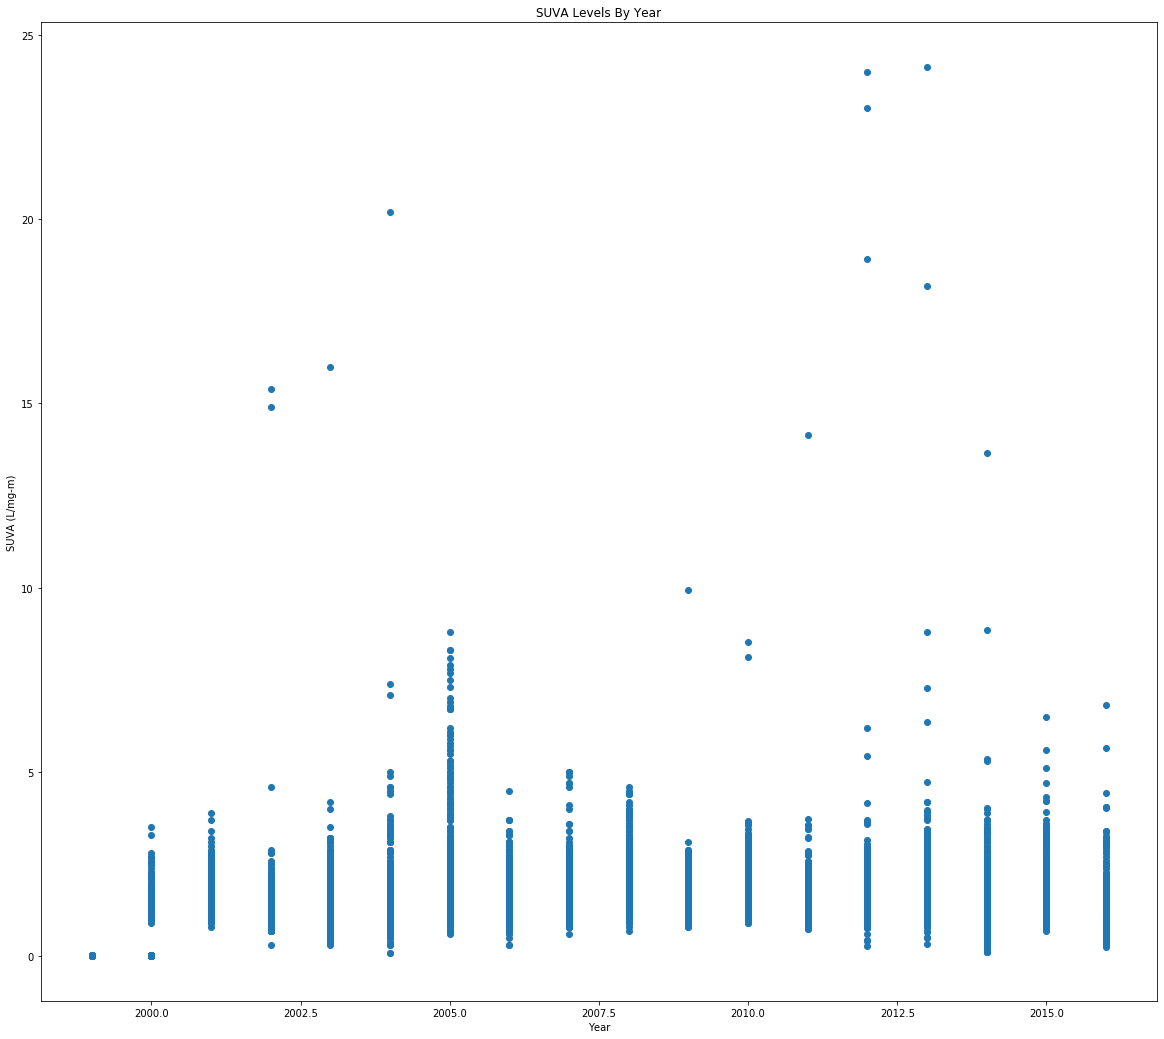

In [27]:
plt.figure(figsize=(20,18))

plt.title("SUVA Levels By Year")
plt.xlabel('Year')
plt.ylabel('SUVA (L/mg-m)')

plt.scatter (suva_x, suva_y)

#plt.savefig('suva levels_1')

This scatter plot shows all of the levels for each resevoir and canal per collection time.

A high level of SUVA means that there is a lot of humic matter in the water, which can create DBPs (Disinfection By Product). 

As shown, there is quite a bit of collective data that goes over the 2 L/mg-m limit.

In [16]:
#Show the original CSV data

carbon_df

,site number,site location,Cluster,site acronym,date,sample type,TOC (mg/L),DOC (mg/L),UVA (cm-1),suva (L/mg-m),peak int,peak int WL,int at 450,int at 460,int at 500,FI (450/500),docm comments
0,R5,Verde River btwn Horseshoe and Bartlett,verde,verde abv bartlett,1999,NaN,2.750,2.777,0.0793,0.028556,92.67,446.36,92.45,87.86,52.34,1.766336,NaN
1,R6A,Bartlett Reservoir near outlet,verde,bartlett-epi,1999,NaN,1.934,1.845,0.0406,0.022005,48.65,448.62,48.23,45.52,27.28,1.767962,NaN
2,R6B,Bartlett Reservoir near outlet,verde,bartlett-hypo,1999,NaN,1.735,1.614,0.0412,0.025527,51.89,448.74,51.38,48.71,29.00,1.771724,NaN
3,R7,Verde River below Bartlett Reservoir,verde,verde blw barlett,1999,NaN,1.775,1.626,0.0373,0.022940,47.95,447.02,47.52,44.38,26.25,1.810286,NaN
4,R10,Salt River below Saguaro (Blue Point Bridge),salt,salt blw saguaro,1999,NaN,2.943,2.711,0.0549,0.020251,62.98,446.30,62.62,58.61,34.44,1.818235,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9880,SPT OUT,Tempe's South Plant treated water,tempe,STP Out,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9881,SRNR,Salt River near Roosevelt,salt,SRNR,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9882,UH IN,Union Hills Inlet,cap,Union Hills Inlet,2016,NaN,NaN,NaN,0.0480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9883,UH IN,Union Hills Inlet,cap,Union Hills Inlet,2016,NaN,NaN,NaN,0.0480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Cleaning up the data to show the information without the TOC Levels

second_cleanup = carbon_df [["site number", "site location", "Cluster", "date", "DOC (mg/L)", "UVA (cm-1)", "suva (L/mg-m)"]]
second_cleanup = second_cleanup.dropna()

In [18]:
second_cleanup.count()

site number      6317
site location    6317
Cluster          6317
date             6317
DOC (mg/L)       6317
UVA (cm-1)       6317
suva (L/mg-m)    6317
dtype: int64

In [19]:
#Creating a scatter plot with the DOC data

doc_x = second_cleanup['date'];
doc_y = second_cleanup['DOC (mg/L)']

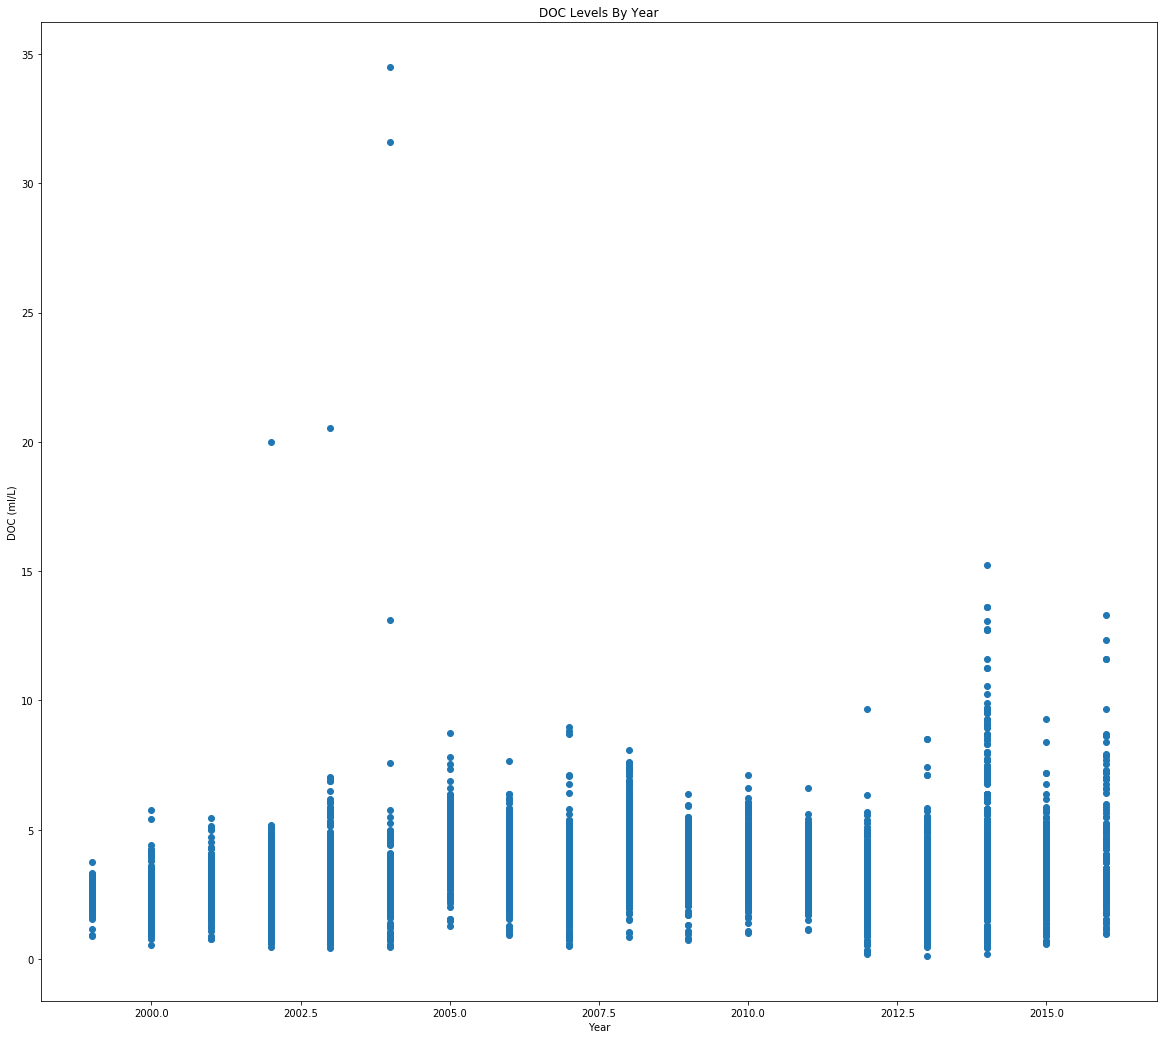

In [28]:
plt.figure(figsize=(20,18))

plt.title("DOC Levels By Year")
plt.xlabel('Year');
plt.ylabel('DOC (ml/L)')

plt.scatter (doc_x,doc_y)

#plt.savefig('doc levels_2')

As you can see, the DOC levels remained in a normal level in more recent years.

In [21]:
#Creating a scatter plot with the UVA data

uva_x = second_cleanup['date'];
uva_y = second_cleanup['UVA (cm-1)']

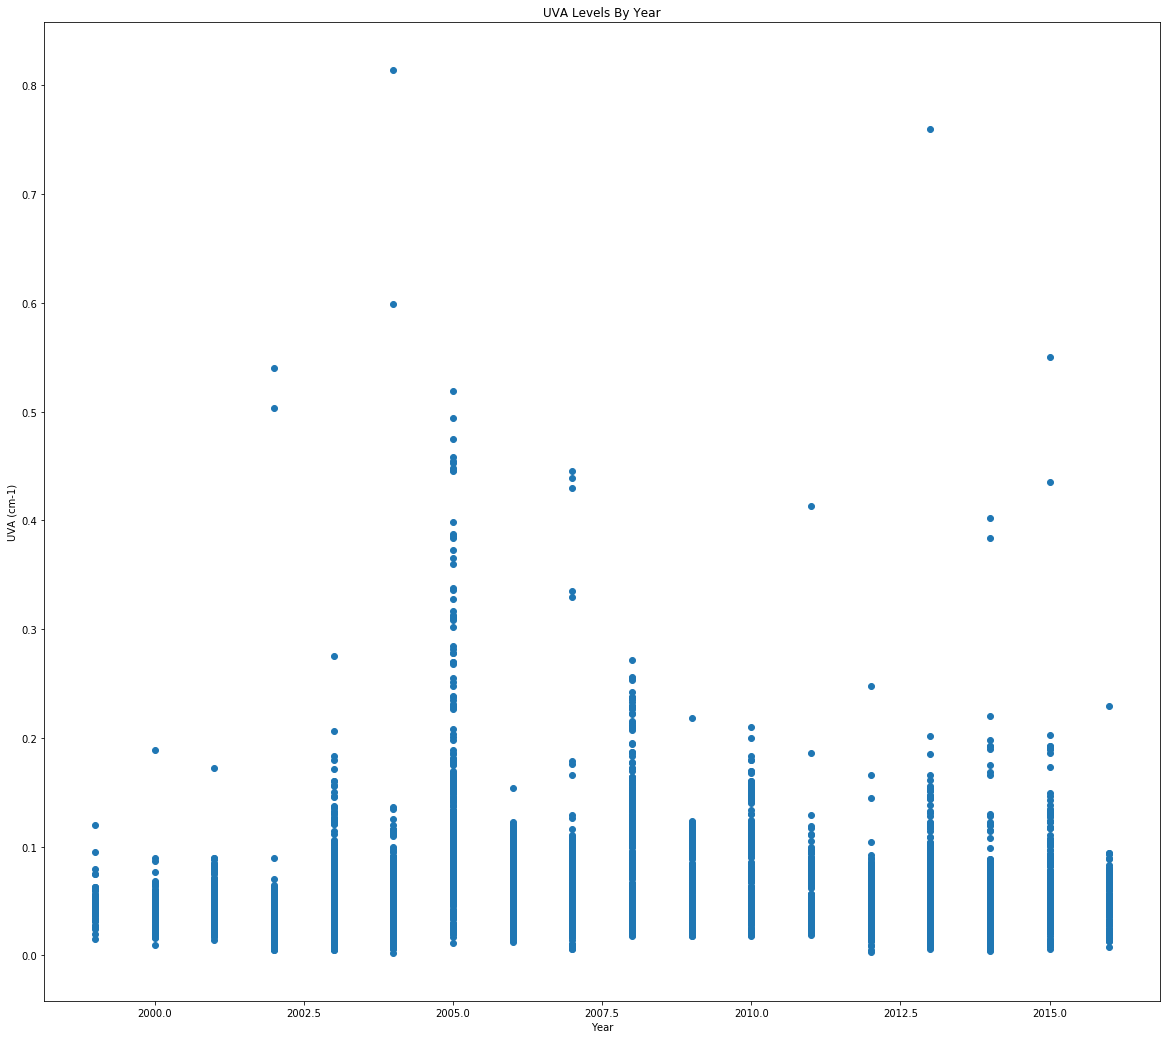

In [29]:
plt.figure(figsize=(20,18))

plt.title("UVA Levels By Year")
plt.xlabel('Year');
plt.ylabel('UVA (cm-1)')

plt.scatter (uva_x,uva_y)

#plt.savefig('uva levels_2')

Adding the more recent years to the UVA collection still shows consistency with the amount of carbon we are able to see via UV light.

In [23]:
#Creating a scatter plot with the SUVA data

suva_x = second_cleanup['date'];
suva_y = second_cleanup['suva (L/mg-m)']

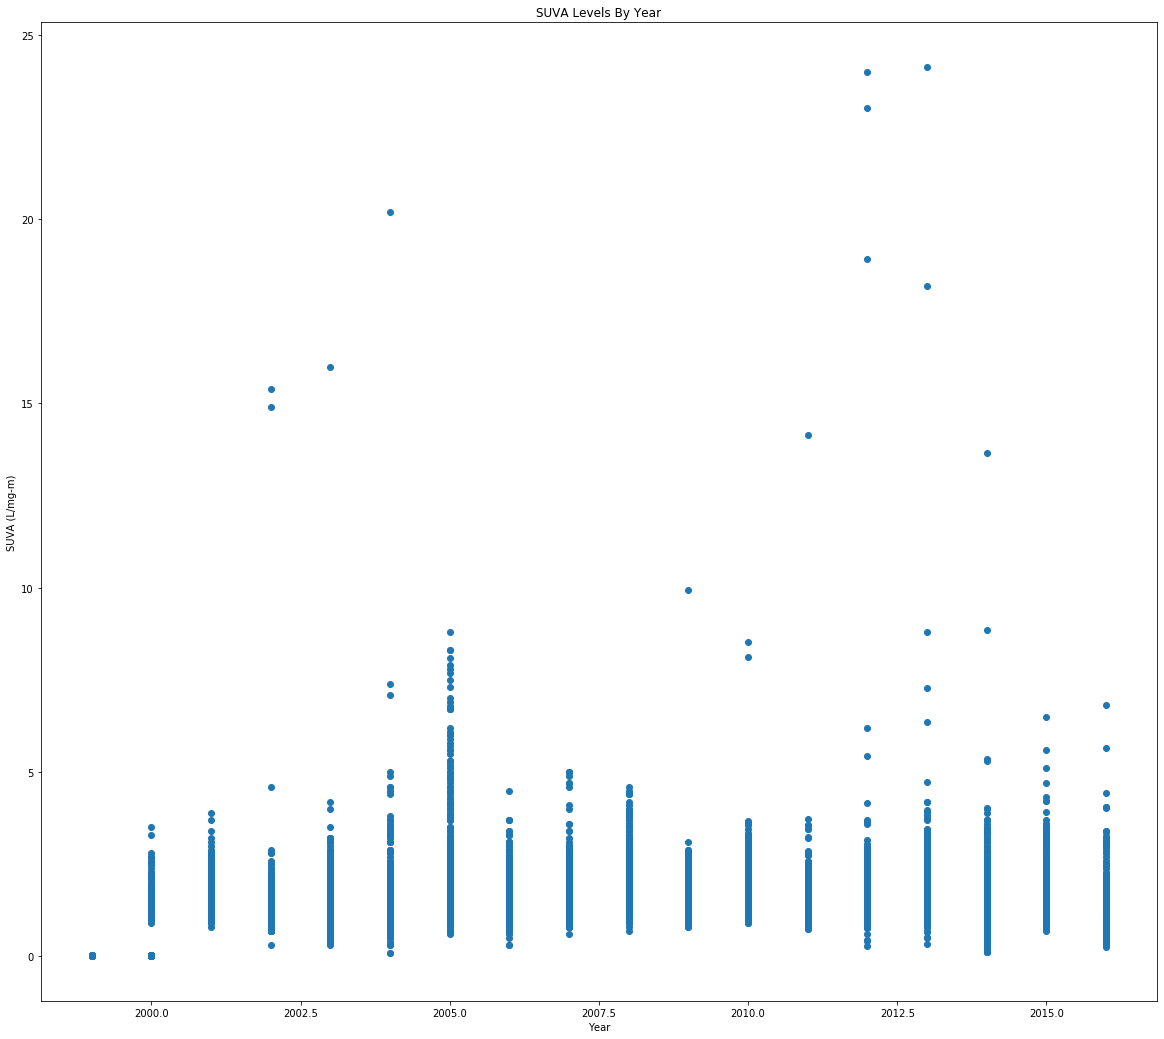

In [30]:
plt.figure(figsize=(20,18))

plt.title("SUVA Levels By Year")
plt.xlabel('Year')
plt.ylabel('SUVA (L/mg-m)')

plt.scatter (suva_x, suva_y)

#plt.savefig('suva levels_2')

Here, we are still seeing a few instances where the SUVA levels are going high, however, the numbers stayed at a more consistent lower level in more recent years.